# Imperial College Covid19 - Brasil

In [19]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# leitura dos dados
data = pd.ExcelFile("data/Imperial-College-COVID19-Global-unmitigated-mitigated-suppression-scenarios.xlsx")

In [21]:
# Abas disponíveis
print(data.sheet_names)

['Countries', 'Mitigation', 'Suppression', 'Dictionary']


In [22]:
# Aba Mitigation
mitigation_df = pd.read_excel(data, data.sheet_names[1])

# print column names
print(mitigation_df.columns)

Index(['Country', 'R0', 'Strategy', 'Social_distance', 'total_pop',
       'total_infected', 'total_deaths', 'total_hospital', 'total_critical'],
      dtype='object')


In [23]:
# Aba Supression
supression_df = pd.read_excel(data, data.sheet_names[2])

# print column names
print(supression_df.columns)

Index(['Country', 'R0', 'Strategy', 'Social_distance',
       'Deaths per week at trigger', 'total_pop', 'total_infected',
       'total_deaths', 'total_hospital', 'peak_hospital_bed_demand',
       'total_critical', 'peak_critical_bed_demand'],
      dtype='object')


In [24]:
# slice nos dados do Brasil
br_mitigation_df = mitigation_df.loc[mitigation_df['Country']=='Brazil', :]
br_mitigation_df

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
23,Brazil,3.3,Unmitigated,0.000000,212559409.0,187799806,1152283,6206514,1527536
224,Brazil,3.3,Social distancing whole population,0.449681,212559409.0,122025818,627047,3496359,831381
425,Brazil,3.3,Enhanced social distancing of elderly,0.440651,212559409.0,120836850,529779,3222096,702497
626,Brazil,3.0,Unmitigated,0.000000,212559409.0,181084337,1088612,5891295,1443116
827,Brazil,3.0,Social distancing whole population,0.422029,212559409.0,114348169,576128,3222624,764105
1028,Brazil,3.0,Enhanced social distancing of elderly,0.412113,212559409.0,112988886,471742,2925842,625338
1229,Brazil,2.7,Unmitigated,0.000000,212559409.0,172162607,1008804,5490012,1337612
1430,Brazil,2.7,Social distancing whole population,0.390273,212559409.0,105309523,518315,2909776,687127
1631,Brazil,2.7,Enhanced social distancing of elderly,0.370706,212559409.0,102598007,322646,2348908,427709
1832,Brazil,2.4,Unmitigated,0.000000,212559409.0,160125948,908009,4974643,1204268


In [25]:
# valores percentuais e por milhão
perc_names = list(br_mitigation_df.columns.values[5:9]+'_perc')
mil_names = list(br_mitigation_df.columns.values[5:9]+'_milhoes')
br_mitigation_df[perc_names] = br_mitigation_df.loc[:,'total_infected':
                                                        'total_critical'].div(br_mitigation_df['total_pop'],
                                                                                              axis=0)*100
br_mitigation_df[mil_names] = br_mitigation_df.loc[:,'total_infected':
                                                       'total_critical']*1e-6

In [26]:
# sem nenhuma ação de distanciamento social - %
no_social_distance = br_mitigation_df.loc[br_mitigation_df['Strategy']==
                                          'Unmitigated', :].drop(["Social_distance", "Country"], axis=1)
no_social_distance

,R0,Strategy,total_pop,total_infected,total_deaths,total_hospital,total_critical,total_infected_perc,total_deaths_perc,total_hospital_perc,total_critical_perc,total_infected_milhoes,total_deaths_milhoes,total_hospital_milhoes,total_critical_milhoes
23,3.3,Unmitigated,212559409.0,187799806,1152283,6206514,1527536,88.351679,0.542099,2.919896,0.718640,187.799806,1.152283,6.206514,1.527536
626,3.0,Unmitigated,212559409.0,181084337,1088612,5891295,1443116,85.192341,0.512145,2.771599,0.678924,181.084337,1.088612,5.891295,1.443116
1229,2.7,Unmitigated,212559409.0,172162607,1008804,5490012,1337612,80.995053,0.474599,2.582813,0.629289,172.162607,1.008804,5.490012,1.337612
1832,2.4,Unmitigated,212559409.0,160125948,908009,4974643,1204268,75.332327,0.427179,2.340354,0.566556,160.125948,0.908009,4.974643,1.204268


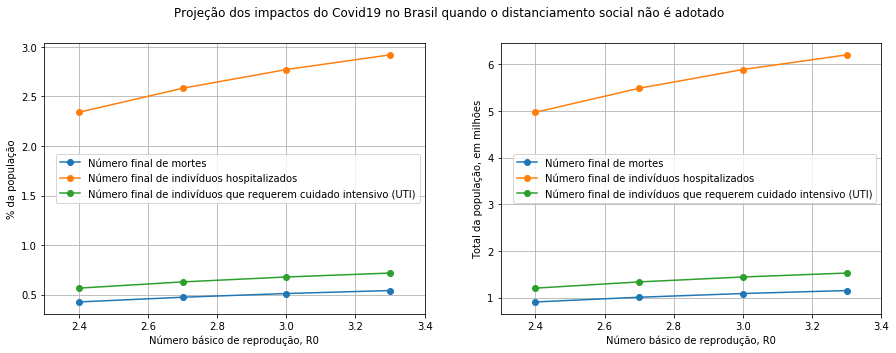

In [34]:
# plot
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# percentual plot
no_social_distance.plot(x="R0", y=['total_deaths_perc',
                                   'total_hospital_perc',
                                   'total_critical_perc'],
                        style='o-',
                        ax=ax[0],
                       label=['Número final de mortes',
                              'Número final de indivíduos hospitalizados',
                              'Número final de indivíduos que requerem cuidado intensivo (UTI)'])
ax[0].set_ylabel("% da população")
ax[0].set_xlabel("Número básico de reprodução, R0")
ax[0].set_xlim([2.3, 3.4])
ax[0].grid()

# absolute values plot
no_social_distance.plot(x="R0", y=['total_deaths_milhoes',
                                   'total_hospital_milhoes',
                                   'total_critical_milhoes'],
                        style='o-',
                        ax=ax[1],
                       label=['Número final de mortes',
                              'Número final de indivíduos hospitalizados',
                              'Número final de indivíduos que requerem cuidado intensivo (UTI)'])
ax[1].set_ylabel("Total da população, em milhões")
ax[1].grid()
plt.suptitle("Projeção dos impactos do Covid19 no Brasil quando o distanciamento social não é adotado")
ax[1].set_xlabel("Número básico de reprodução, R0")
ax[1].set_xlim([2.3, 3.4])
plt.show()

In [35]:
# comparativo de estratégias
social_distance = br_mitigation_df.drop(["Country"], axis=1)

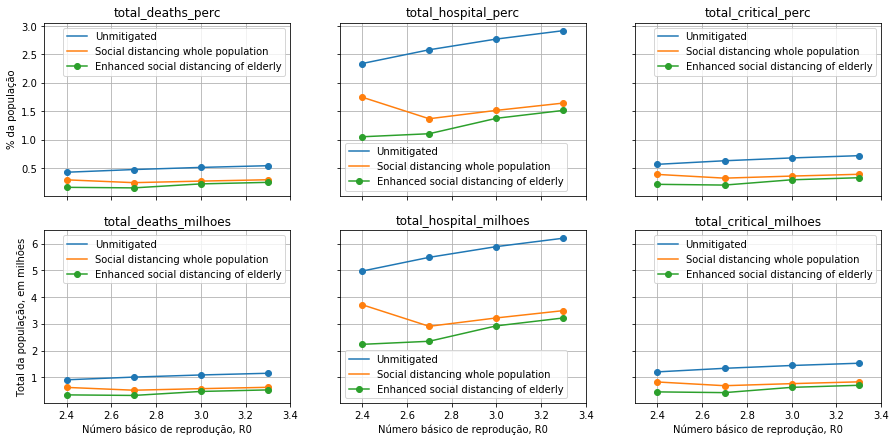

In [108]:
# plot
y=['total_deaths',
   'total_hospital',
   'total_critical']
n = len(y)
fig, ax = plt.subplots(ncols=len(y),nrows=2, figsize=(15, 7), sharex=True, sharey='row')
for i in range(n):
    # column
    column = [y[i]+'_perc', y[i]+'_milhoes']
    df = social_distance.loc[:, column+['R0', 'Strategy']]
    for s in df['Strategy'].unique():
        # percent plot
        df.loc[df['Strategy']==s, :].plot(x='R0', y=[column[0]], style='o-', ax=ax[0][i], label=[s])
        ax[0][i].grid()
        ax[0][i].set_title(column[0])
        ax[0][i].set_xlim([2.3, 3.4])
        ax[0][i].set_ylabel("% da população")
        ax[0][i].set_xlabel("Número básico de reprodução, R0")
        
        # absolute plot
        df.loc[df['Strategy']==s, :].plot(x='R0', y=[column[1]], style='o-', ax=ax[1][i], label=[s])
        ax[1][i].grid()
        ax[1][i].set_title(column[1])
        ax[1][i].set_xlim([2.3, 3.4])
        ax[1][i].set_ylabel("Total da população, em milhões")
        ax[1][i].set_xlabel("Número básico de reprodução, R0")